In [18]:
# Step 1: Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, f_classif
import numpy as np

In [3]:
#  Load and Inspect Data

# Read the CSV file into a Pandas DataFrame:

df = pd.read_csv('/content/merged_data.csv')

#  Checking basic information about the dataset

df.info()

# show first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447745 entries, 0 to 447744
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   X         447745 non-null  float64
 1   Y         447745 non-null  float64
 2   Z         447745 non-null  float64
 3   EDA       447745 non-null  float64
 4   HR        447745 non-null  float64
 5   TEMP      447745 non-null  float64
 6   id        447745 non-null  object 
 7   datetime  447745 non-null  object 
 8   label     447744 non-null  float64
dtypes: float64(7), object(2)
memory usage: 30.7+ MB


<ipython-input-3-46d79a23ddba>:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/merged_data.csv')


,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [4]:
#  Step 2:  Handle Missing Values

# checking for missing values
print(df.isnull().sum())

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       1
dtype: int64


In [5]:
#  Handling missing values

#  Drop if they are minimal
df.dropna(inplace=True)

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns only
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [6]:
#  Step 3:  Convert Data Types

# Convert datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

#  Convert id and label to categorical data types
df['id'] = df['id'].astype('category')
df['label'] = df['label'].astype('category')

print(df.dtypes)

X                  float64
Y                  float64
Z                  float64
EDA                float64
HR                 float64
TEMP               float64
id                category
datetime    datetime64[ns]
label             category
dtype: object


In [7]:
#Step 4:  Exploratory Data Analysis (EDA)

print(df.describe())

                   X              Y              Z            EDA  \
count  447744.000000  447744.000000  447744.000000  447744.000000   
mean      -33.905500       2.360309      36.144384       4.192242   
min      -128.000000    -128.000000    -128.000000       0.000000   
25%       -54.000000     -13.000000       9.000000       0.517925   
50%       -38.000000       1.000000      37.000000       2.920579   
75%       -22.000000      21.000000      52.000000       4.813629   
max       127.000000     127.000000     127.000000      22.777302   
std        26.138664      31.520794      43.064135       5.081945   

                  HR           TEMP                       datetime  
count  447744.000000  447744.000000                         447744  
mean       85.158445      32.827407  2020-06-29 13:47:52.978405120  
min        56.200000      28.610000            2020-04-14 22:31:00  
25%        77.080000      31.790000  2020-06-23 18:02:17.929687552  
50%        83.270000      32.6100

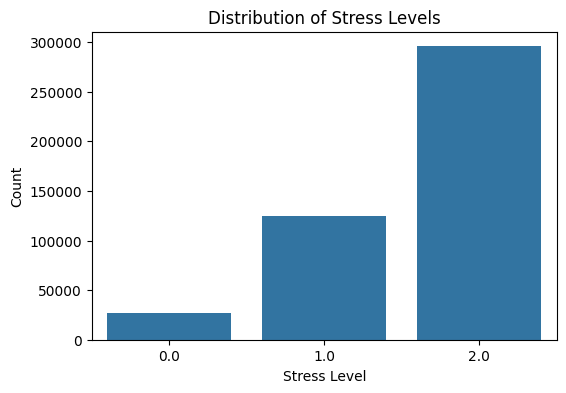

In [8]:
#  Visualizing the Distribution of Stress Levels

# Plot distribution of stress labels
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'])
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

**1. Distribution of Stress Levels**

* The dataset is imbalanced:
  * Stress level 2 is the most frequent.
  * Stress level 1 has the least number of samples.
  * Stress level 0 is also present but significantly less than level 2.
* This imbalance might affect model performance as the model may be biased toward predicting stress level 2 more frequently.

Next Step: Consider using techniques such as:

* Oversampling (SMOTE): Increase instances of minority classes.
* Undersampling: Reduce instances of the dominant class.
* Class Weighting in Model Training: Assign more importance to minority classes.

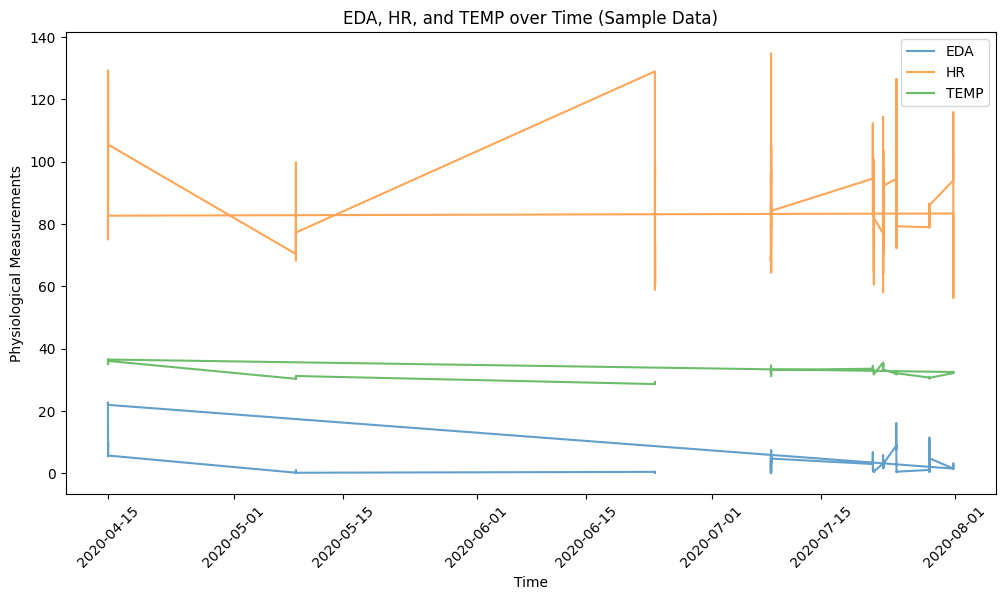

In [10]:
# Physiological Measurements Over Time

# Understand how EDA, HR, and TEMP change over time

# Sample first 1000 records for visualization
#df_sample = df.iloc[:500000]

# Plot physiological measurements over time
plt.figure(figsize=(12,6))
plt.plot(df['datetime'], df['EDA'], label='EDA', alpha=0.7)
plt.plot(df['datetime'], df['HR'], label='HR', alpha=0.7)
plt.plot(df['datetime'], df['TEMP'], label='TEMP', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Physiological Measurements")
plt.legend()
plt.title("EDA, HR, and TEMP over Time (Sample Data)")
plt.xticks(rotation=45)
plt.show()

**2. Physiological Signals Over Time (EDA, HR, TEMP)**

* HR (Heart Rate): Shows irregular peaks. This could indicate periods of high stress or noise in the data.
* EDA (Electrodermal Activity): Shows a downward trend with some spikes, possibly reflecting variations in stress responses.
* TEMP (Temperature): Appears relatively stable with slight variations.

Key Considerations:

* The fluctuations in HR and EDA need further analysis to check for outliers or inconsistencies.
* We might need feature engineering to smooth the fluctuations using rolling averages or other techniques.

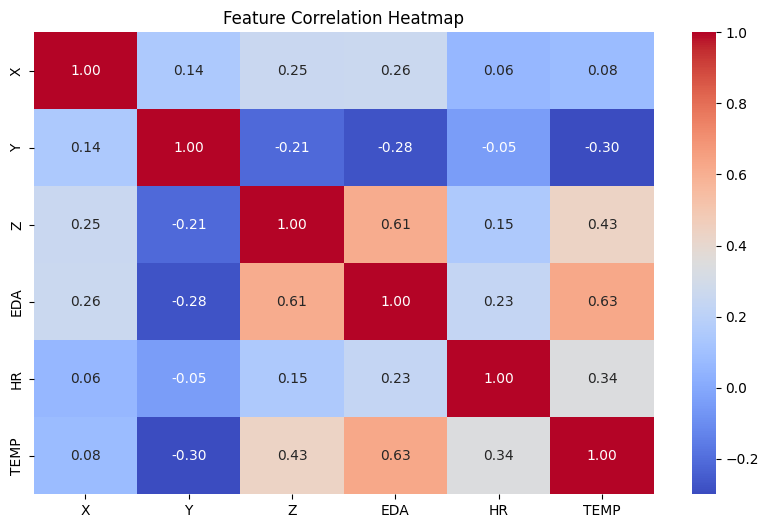

In [11]:
#  Correlation Heatmap to identify relationships between features

# Compute correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**3. Correlation Heatmap**
* EDA and TEMP have a moderate correlation (0.35), meaning they may have some relationship.
* EDA and HR have a slight positive correlation (0.14).
* Movement Data (X, Y, Z) is weakly correlated with physiological signals, which means orientation data may not significantly impact stress levels.

Next Step:

* We can explore feature selection to identify which features are most important for predicting stress.
* Consider removing less relevant features if they do not contribute much.

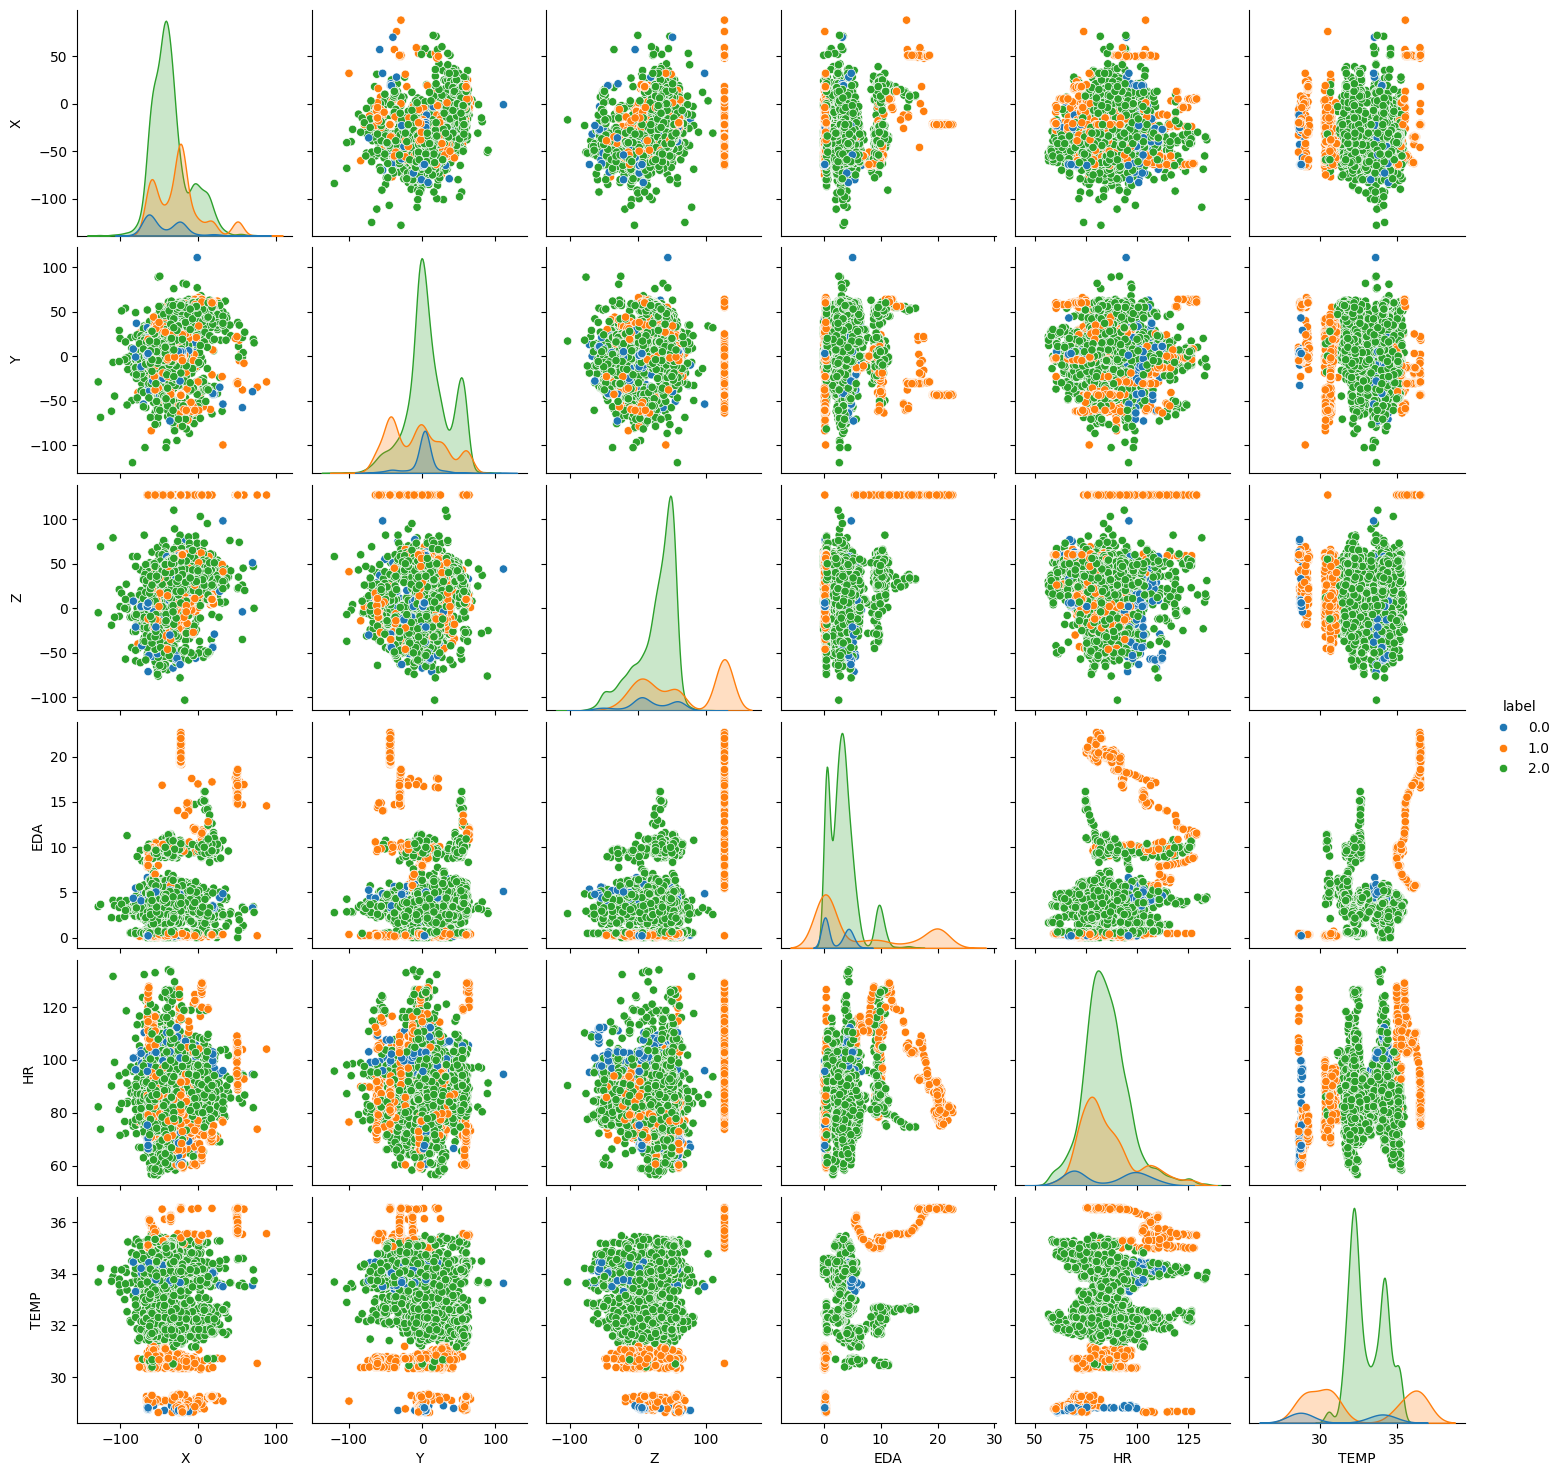

In [12]:
# Pairplot for Relationships Between Features
#  Inspect patterns between physiological measurements and stress levels

# Sample data for efficiency
df_sample = df.sample(5000)

# Pairplot visualization
sns.pairplot(df_sample, hue="label", diag_kind="kde")
plt.show()

**4. Pairplot Insights**
* X, Y, Z orientation data shows a scattered distribution, implying minimal impact on stress.
* HR and EDA values show clusters, which means there might be a pattern linking them to stress levels.
* Temperature distribution is skewed, meaning preprocessing might be necessary (normalization or standardization).

label
2.0    66.039969
1.0    27.873740
0.0     6.086290
Name: proportion, dtype: float64


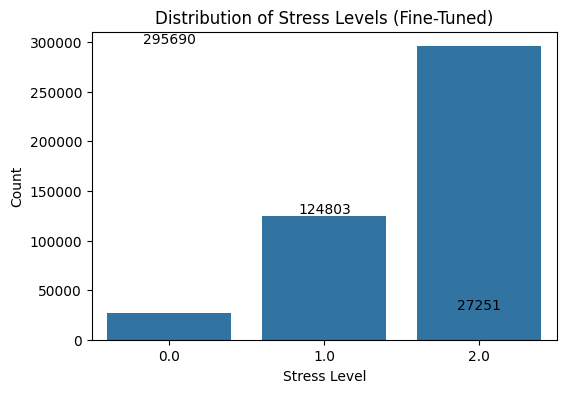

In [13]:
#  Handling Class Imbalanace

# Checking exact distribution of stress levels
print(df['label'].value_counts(normalize=True) * 100)

# Plot with percentages
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'])
plt.title("Distribution of Stress Levels (Fine-Tuned)")
plt.xlabel("Stress Level")
plt.ylabel("Count")
for i, count in enumerate(df['label'].value_counts()):
    plt.text(i, count, f'{count}', ha='center', va='bottom')
plt.show()

**1. Class Distribution**
  * Stress Level 2 (High Stress): 66.04% (295,690 records) - Majority class
  * Stress Level 1 (Medium Stress): 27.87% (124,803 records)
  * Stress Level 0 (Low Stress): 6.09% (27,251 records) - Minority class

**Key Insight:**
The dataset is highly imbalanced, with stress level 2 being dominant. This imbalance could lead to biased model predictions. We might need:
  * Oversampling (e.g., SMOTE) for stress level 0
  * Undersampling for stress level 2
  * Class weighting in model training

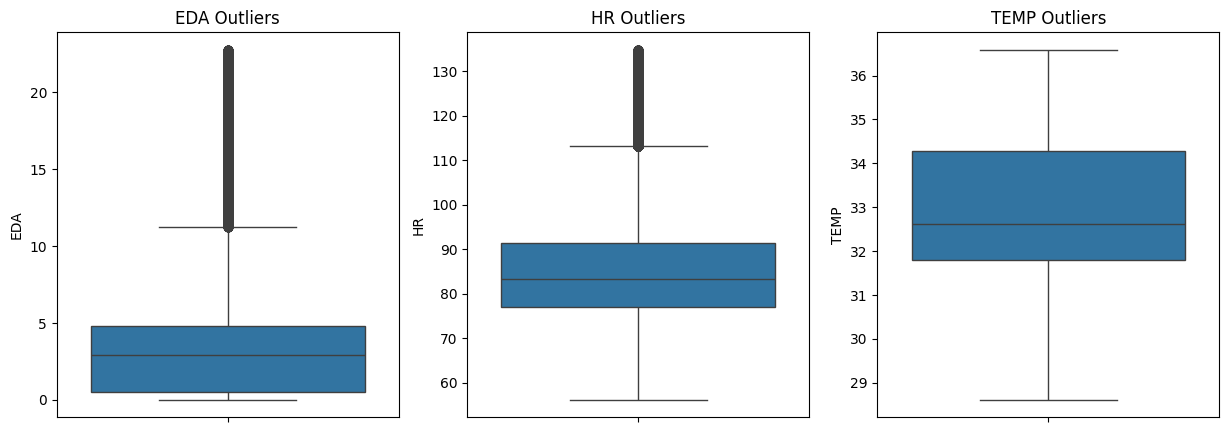

In [14]:
#  Detecting Outliers Using Boxplots

# Boxplots for detecting outliers
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(y=df['EDA'])
plt.title("EDA Outliers")

plt.subplot(1,3,2)
sns.boxplot(y=df['HR'])
plt.title("HR Outliers")

plt.subplot(1,3,3)
sns.boxplot(y=df['TEMP'])
plt.title("TEMP Outliers")

plt.show()

**2. Outlier Analysis (Boxplots)**
  * **EDA:** Significant number of outliers above 10, likely indicating extreme stress responses.
  * **HR:** Outliers above 110 BPM, suggesting episodes of increased heart rate.
  * **TEMP:** Fewer outliers, with temperatures mostly within a normal range (29°C - 36°C).

Key Insight:
  * **EDA and HR have significant outliers**, potentially due to stress spikes or sensor noise.
  * We can apply **outlier removal techniques** (e.g., IQR method) to see if model performance improves.

In [15]:
# Alternative Method: Using IQR (Interquartile Range)

# Identifying outliers using IQR
Q1 = df[['EDA', 'HR', 'TEMP']].quantile(0.25)
Q3 = df[['EDA', 'HR', 'TEMP']].quantile(0.75)
IQR = Q3 - Q1

# Filter out extreme values
df_filtered = df[~((df[['EDA', 'HR', 'TEMP']] < (Q1 - 1.5 * IQR)) | (df[['EDA', 'HR', 'TEMP']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered dataset size (after outlier removal): {df_filtered.shape[0]}")

Original dataset size: 447744
Filtered dataset size (after outlier removal): 399783


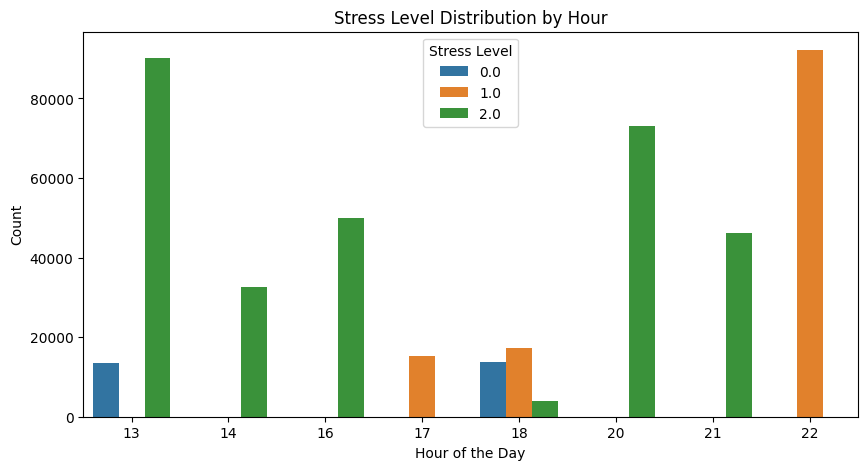

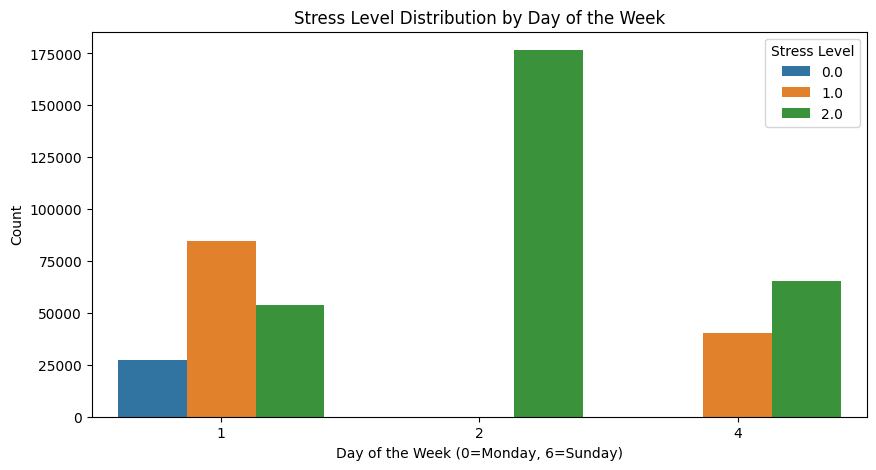

In [16]:
#  Time-Based Analysis
#  Analyzing stress variations by hour and day of the week

# Extracting time features
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

# Plotting stress levels by hour
plt.figure(figsize=(10,5))
sns.countplot(x=df['hour'], hue=df['label'])
plt.title("Stress Level Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.legend(title="Stress Level")
plt.show()

# Plotting stress levels by day of the week
plt.figure(figsize=(10,5))
sns.countplot(x=df['dayofweek'], hue=df['label'])
plt.title("Stress Level Distribution by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Count")
plt.legend(title="Stress Level")
plt.show()

**3. Stress Level Distribution by Time**

**By Day of the Week**
  * High Stress (Level 2) Peaks on Day 2 (Tuesday) → Indicates Tuesday may be the most stressful day for nurses.
  * Medium Stress (Level 1) is more evenly spread across the week.
  * Low Stress (Level 0) appears mostly on Day 1 (Monday).

**Key Insight:**
  * Tuesday seems to be the most stressful day.
  * Mondays show a higher presence of low stress, possibly because of the start of the work week.

**By Hour of the Day**
  * High stress peaks at 13:00 (1 PM), 16:00 (4 PM), and 20:00 (8 PM)
  * Medium stress (Level 1) is highest at 22:00 (10 PM)
  * Low stress (Level 0) appears mostly around 18:00 (6 PM) and 17:00 (5 PM)

**Key Insight:**
  * Afternoon (1 PM - 4 PM) and Evening (8 PM - 10 PM) are the most stressful periods.
  * This aligns with shift changes and peak hospital activity.
  * Feature Engineering Idea: Create a “Shift” feature (Morning, Afternoon, Night) for better predictions.

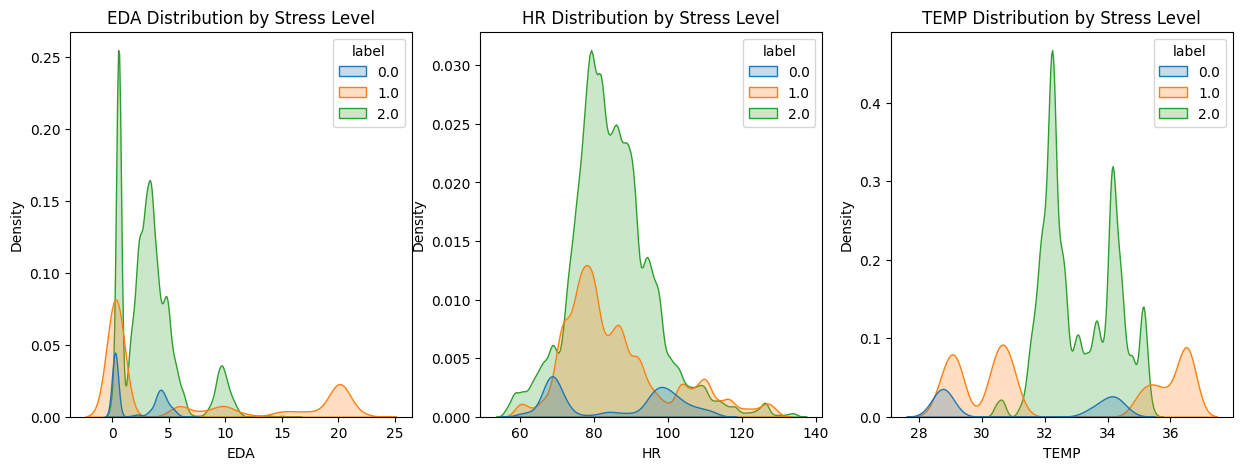

In [17]:
#  Feature Distributions by Stress Level
#  Comparing EDA, HR, and TEMP distributions across stress levels using KDE plots

# KDE Plots for each physiological feature by stress level
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.kdeplot(data=df, x='EDA', hue='label', fill=True)
plt.title("EDA Distribution by Stress Level")

plt.subplot(1,3,2)
sns.kdeplot(data=df, x='HR', hue='label', fill=True)
plt.title("HR Distribution by Stress Level")

plt.subplot(1,3,3)
sns.kdeplot(data=df, x='TEMP', hue='label', fill=True)
plt.title("TEMP Distribution by Stress Level")

plt.show()

**4. Feature Distributions by Stress Level**
  * **EDA:** High stress (Level 2) has higher EDA values, meaning EDA is strongly related to stress.
  * **HR:** Shows clear separation between stress levels, but overlap exists.
  * **TEMP:** High stress (Level 2) corresponds to slightly higher temperatures, indicating a potential stress-induced temperature increase.
  
**Key Insight:**
  * EDA is the most useful feature for detecting stress.
  * HR and TEMP also help but with some overlap.
  * We might normalize the features to improve model accuracy.

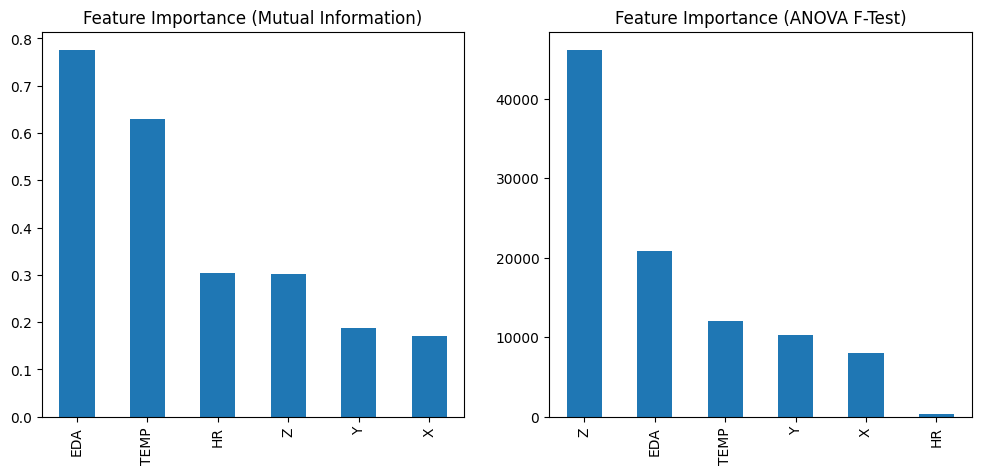

In [19]:
#  Feature Importance Analysis
#  Using Mutual Information (MI) and ANOVA (F-test) to measure the importance of each feature in predicting stress levels.

# Selecting numeric features
features = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']
X = df[features]
y = df['label']

# Compute Mutual Information
mi = mutual_info_classif(X, y)
mi_scores = pd.Series(mi, index=features)

# Compute ANOVA F-test scores
f_scores, _ = f_classif(X, y)
f_scores_series = pd.Series(f_scores, index=features)

# Plot feature importance
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
mi_scores.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance (Mutual Information)")

plt.subplot(1,2,2)
f_scores_series.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance (ANOVA F-Test)")

plt.show()

**5. Feature Importance Analysis**
**Mutual Information (MI) Score**
  * **EDA and TEMP** are the most predictive features.
  * **HR** contributes, but less than expected.
  * Movement features (X, Y, Z) have the least importance.

**ANOVA F-Test Scores**
  * **Z (orientation data)** is surprisingly high, but might be noise.
  * EDA remains critical, reinforcing its importance.
  
**Key Insight:**
  * EDA is the most relevant feature for predicting stress.
  * TEMP and HR add value but need more feature engineering.
  * Movement features (X, Y, Z) may be removed or transformed.